In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Padding a 2D mesh

This notebook shows how to pad a 2D mesh.

<IPython.core.display.Javascript object>


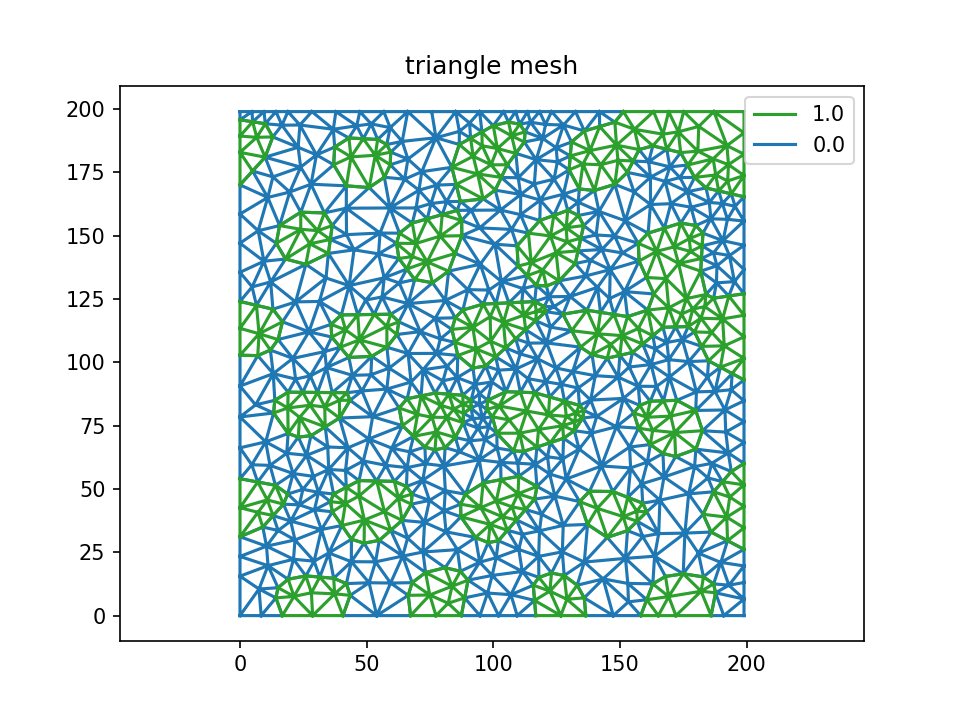

In [2]:
from nanomesh.mesh import TriangleMesh

mesh = TriangleMesh.read(filename='mesh.msh')

# Third dimension was added for compatibility with gmsh2.2
mesh.drop_third_dimension()

mesh.plot()

### Padding a mesh

The `.pad` method pads an array on the defined side with triangles. The width, mesh quality, and label assigned to this this area can be defined.

This example shows how to double pad the left and right sides with different triangle sizes for each step.

<IPython.core.display.Javascript object>


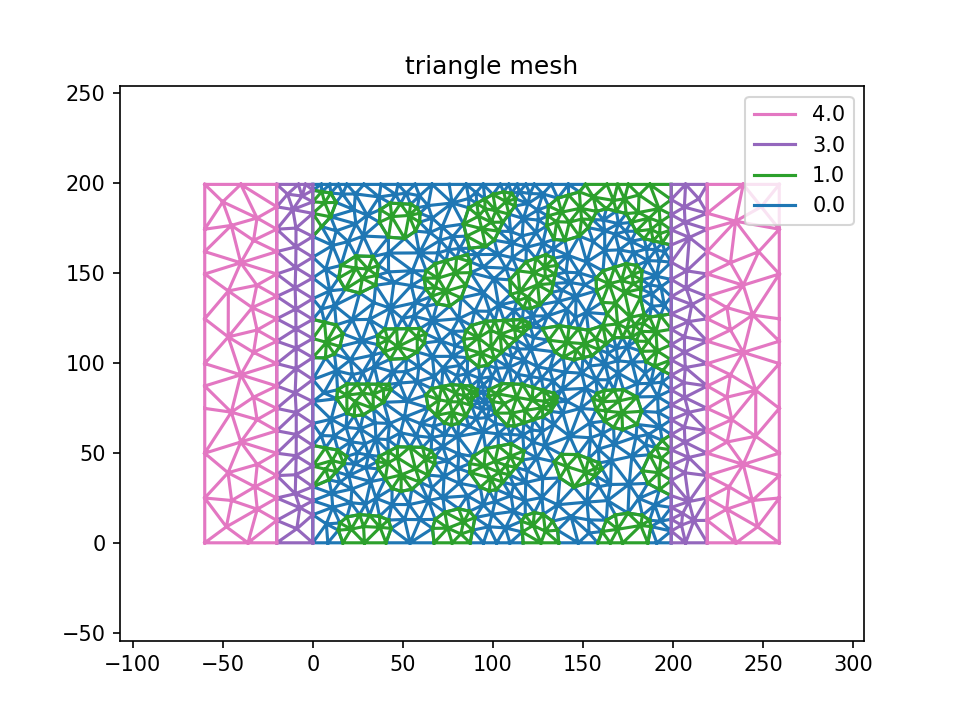

In [3]:
import copy

padded_mesh = copy.copy(mesh)

padded_mesh = padded_mesh.pad(side='left', width=20, opts='q30a100', label=3)
padded_mesh = padded_mesh.pad(side='left', width=40, opts='q30a200', label=4)

padded_mesh = padded_mesh.pad(side='right', width=20, opts='q30a100', label=3)
padded_mesh = padded_mesh.pad(side='right', width=40, opts='q30a200', label=4)

padded_mesh.plot()

This pattern is infinitely extensible. The example below shows the flexibility of the method.

<IPython.core.display.Javascript object>


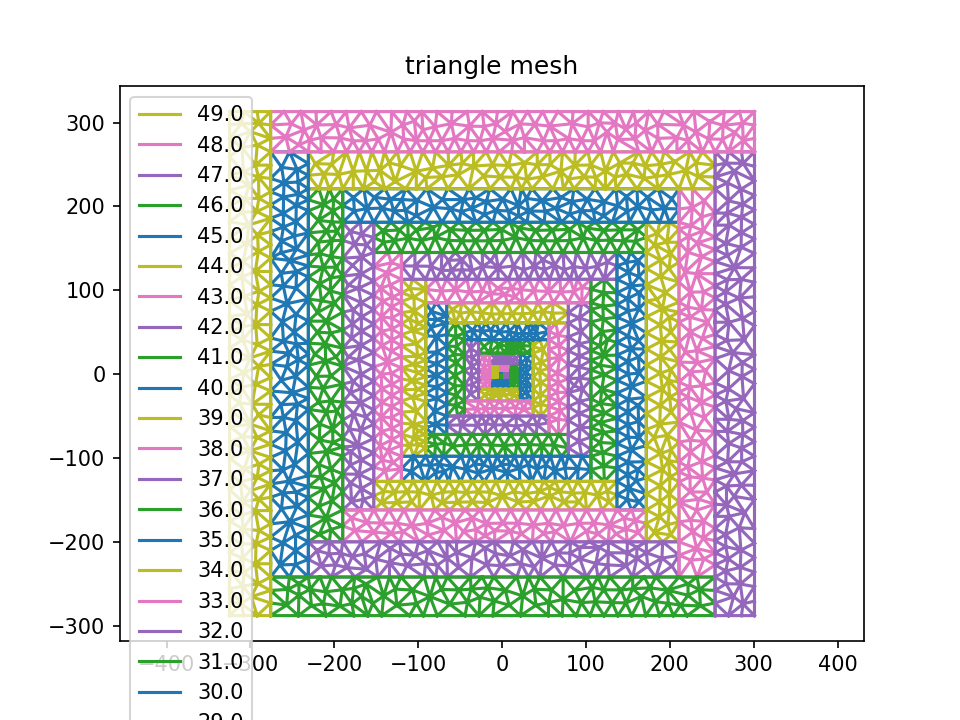

In [4]:
from itertools import cycle
import numpy as np
from nanomesh import simple_triangulate

points = np.array([[0,0], [0,1], [1,1], [1,0]])
mesh = simple_triangulate(points, opts='q30a0.1')

spiral_mesh = mesh.get('triangle')

choices = ('left', 'bottom', 'right', 'top')

for i, side in zip(range(1, 50), cycle(choices)):
    spiral_mesh = spiral_mesh.pad(side=side, width=i, opts=f'q30a{i*5}')

spiral_mesh.plot()       